## Downloading and cleaning up the data

In [10]:
# Download the python packages
!pip install yfinance --upgrade --no-cache-dir
!pip install ta
!pip install datasets
!pip install files

  Preparing metadata (setup.py) ... done
  Created wheel for files: filename=files-1.1.1-py3-none-any.whl size=3649 sha256=3981ee3a021618702187233a13c7be5d84a14a8edb58bf09591be7fa5fa8e31b
  Stored in directory: /Users/rob/Library/Caches/pip/wheels/b8/6e/58/b1fda9a97300376203495d44f98f1ccccb786c17bc40a6be79
Successfully built files


In [11]:
# yfinance is the API and ta is a technical analysis tool
import yfinance as yf
import ta
import matplotlib.pyplot as plt

# For data manipilation
import pandas as pd


import os
import files

In [3]:
def pull_stock_data(stocks, start_date, end_date, interval):
    stock_data = dict()

    for stock in stocks:
        stock_data[stock] = yf.download(stock, start=start_date, end=end_date, interval=interval)
        if len(stock_data[stock])==0:
          del stock_data[stock]

    return stock_data

def pull_stock_indicators(stock_data):

    for stock in stock_data.keys():
        # Adding simple moving average 20 and 50
        stock_data[stock]['SMA_20'] = ta.trend.sma_indicator(close=stock_data[stock]['Close'], window=20)
        stock_data[stock]['SMA_50'] = ta.trend.sma_indicator(close=stock_data[stock]['Close'], window=50)

        # Adding stochastic oscillators
        stock_data[stock]['%K'] = ta.momentum.stoch(high=stock_data[stock]['High'], low=stock_data[stock]['Low'], close=stock_data[stock]['Close'], window=14)
        stock_data[stock]['%D'] = ta.momentum.stoch_signal(high=stock_data[stock]['High'], low=stock_data[stock]['Low'], close=stock_data[stock]['Close'], window=14)

        # Adding RSI indicator
        stock_data[stock]['RSI'] = ta.momentum.RSIIndicator(close=stock_data[stock]['Close'], window=14).rsi()

        # Calculate Bollinger Bands
        bollinger_bands = ta.volatility.BollingerBands(close=stock_data[stock]['Close'], window=20, window_dev=2)

        # Add Bollinger Bands
        stock_data[stock]['BB_Middle'] = bollinger_bands.bollinger_mavg()
        stock_data[stock]['BB_Upper'] = bollinger_bands.bollinger_hband()
        stock_data[stock]['BB_Lower'] = bollinger_bands.bollinger_lband()

        # Calculate MACD
        macd = ta.trend.MACD(close=stock_data[stock]['Close'], window_fast=12, window_slow=26, window_sign=9)

        # Add MACD and signal line
        stock_data[stock]['MACD'] = macd.macd()
        stock_data[stock]['MACD_Signal'] = macd.macd_signal()

        # Calculate ATR
        atr = ta.volatility.AverageTrueRange(high=stock_data[stock]['High'], low=stock_data[stock]['Low'], close=stock_data[stock]['Close'], window=14)

        # Add ATR
        stock_data[stock]['ATR'] = atr.average_true_range()

    return stock_data

def cleaning_data(stock_data):
    temp_dict = dict()

    for stock in stock_data.keys():
      try:
          temp_dict[stock_data[stock].shape][stock] = stock_data[stock]
      except:
          temp_dict[stock_data[stock].shape] = dict()
          temp_dict[stock_data[stock].shape][stock] = stock_data[stock]

    max_l = max([len(temp_dict[shape]) for shape in temp_dict.keys()])

    for shape in temp_dict.keys():
      if len(temp_dict[shape])==max_l:
        stock_data = temp_dict[shape]
        break

    # Remove all rows where there is a nan/non number entry
    for stock in stock_data.keys():
      stock_data[stock] = stock_data[stock].dropna()

    return stock_data

In [4]:
# Obtaining the SNP 500 companies
stock_dfs = {}

all_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

all_stocks = all_tickers.Symbol.to_list()
# print("SNP500 stocks: "+str(stocks))

tech = ['GOOG', 'T', 'EA', 'META', 'NFLX', 'AMZN', 'ABNB', 'ADBE', 'ORCL', 'CRM',]
comm = ['T', 'VZ', 'CMCSA', 'TMUS', 'CHTR']
defense = ['BA', 'GE', 'GD', 'LHX', 'LMT', 'NOC', 'RTX']
finance = ['BK', 'BX', 'IVZ', 'STT', 'TROW', 'BAC', 'C', 'FITB', 'JPM', 'WFC']


In [5]:
full_stock_data = pull_stock_data(all_stocks, '2023-01-01', '2024-01-01', '1h')
full_stock_data = pull_stock_indicators(full_stock_data)
full_stock_data = cleaning_data(full_stock_data)

# store all the data in one csv file




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [6]:
# Setting up data for AAPL
tech_stock_data = pull_stock_data(tech, '2023-01-01', '2024-01-01', '1h')
tech_stock_data = pull_stock_indicators(tech_stock_data)
tech_stock_data = cleaning_data(tech_stock_data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## LSTM Model

In [ ]:
import sklearn.preprocessing as sklp
import sklearn.model_selection as sklm
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import numpy as np

In [47]:
# code for importing stocks by sector

industry = 'tech'
normalize = True

if industry == 'tech':
  stock_data = tech_stock_data
else:
  stock_data = full_stock_data

if normalize:
  scaler = sklp.MinMaxScaler()
  for key in stock_data.keys():
    stock_data[key] = pd.DataFrame(scaler.fit_transform(stock_data[key]), columns=stock_data[key].columns, index=stock_data[key].index)
  


path = os.path.join(r'/Users/rob/Desktop/CS4701/CS4701/Data/')

for key in stock_data.keys():
  csv = stock_data[key].to_csv(path + key + '.csv')

In [48]:

tickers = list(stock_data.keys())
stock_dfs = []

for i in range(0, len(tickers)):
  stock_dfs.append((tickers[i], stock_data[tickers[i]]))

print(len(stock_dfs))

10


In [49]:
class TimeSeriesDataset(Dataset):
    def __init__(self, name, data, n_lags, forecast_horizon=1, feature_cols=None, label_col='Close', normalize=True):
        self.n_lags = n_lags
        self.forecast_horizon = forecast_horizon
        self.label_col = label_col
        self.name = name

        #allow selection of features
        if feature_cols:
          data = data[feature_cols]
        else:
          data = data[data.columns]

        #normalize features
        if normalize:
          self.scaler = sklp.MinMaxScaler()
          data_scaled = self.scaler.fit_transform(data)

        #create usable data from scaled df
        self.X, self.y = self.create_sequences(data_scaled)

    def create_sequences(self, data):
        X, y = [], []
        for i in range(len(data) - self.n_lags - self.forecast_horizon + 1):
          X.append(data[i:i + self.n_lags])
          y.append(data[i + self.n_lags + self.forecast_horizon - 1, 3])

        return np.array(X), np.array(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx], dtype=torch.float), torch.tensor(self.y[idx], dtype=torch.float)

In [50]:
#params for dataloader
b = 6
f = 1

num_stocks = len(tech) # number of stocks to use

n_lags = 8 * 21 * b #look back n MONTHS: hours/market-day * days * quantity
forecast_horizon = 8 * 5 * f #look ahead f WEEKS (5 trading days/week):

ts_datasets = []

for i in range(0, num_stocks):
  ts_datasets.append((stock_dfs[i][0], TimeSeriesDataset(stock_dfs[i][0], stock_dfs[i][1], n_lags, forecast_horizon)))

print(len(ts_datasets))

10


# LSTM Model:

In [51]:
class LSTM(nn.Module):
    def __init__(self, num_layers, input_size, hidden_size, seq_length, num_classes=1):
        """
        Inputs:
        num_layers: Number of recurrent layers
        input_size: Number of features for input
        hidden_size: Number of features in hidden state
        **these could be wrong**
        seq_length: Length of sequences in a batch
        num_classes: Number of categories for labels

        Outputs: none
        """
        super(LSTM, self).__init__()

        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        self.dense = nn.Sequential(
            nn.Linear(num_layers * hidden_size, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, x):
      '''
      Inputs:
      x: input data

      Outputs:
      out: output of forward pass
      '''

      out, (hn, cn) = self.lstm(x)

      hn = hn.transpose(0, 1).reshape(x.size(0), -1)

      x = self.dense(hn)

      return x

### Data Processing

In [52]:
tvt_datasets = []

for i in range(len(ts_datasets)):
  name, dataset = ts_datasets[i]
  train_size = int(0.8 * len(dataset))
  test_size = 1
  val_size = len(dataset) - train_size - test_size
  train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])
  tvt_datasets.append((name, (train_dataset, val_dataset, test_dataset)))

In [53]:
tvt_dataloaders = []

for i in range(len(tvt_datasets)):
  ticker, (train_dataset, val_dataset, test_dataset) = tvt_datasets[i]
  train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
  val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=True)
  test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)
  tvt_dataloaders.append((ticker, (train_dataloader, val_dataloader, test_dataloader)))

### Train + Validation Logic

In [54]:
def val(model, val_loader, criterion):
    """
    Inputs:
    model (torch.nn.Module): The deep learning model to be trained.
    val_data_loader (torch.utils.data.DataLoader): DataLoader for the validation dataset.
    criterion (torch.nn.Module): Loss function to compute the training loss.

    Outputs:
    Validation Loss
    """
    val_running_loss = 0
    num_correct = 0
    total = 0

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(val_loader, 0):
            labels = labels.view(-1, 1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item()


    return val_running_loss

In [63]:
def train(model, loaders, criterion, epochs, optimizer, ticker):
  """
    Inputs:
    model (torch.nn.Module): The deep learning model to be trained.
    train_loader (torch.utils.data.DataLoader): DataLoader for the training dataset.
    val_loader (torch.utils.data.DataLoader): DataLoader for the validation dataset.
    criterion (torch.nn.Module): Loss function to compute the training loss.
    epochs: Number of epochs to train for.
    optimizer: The optimizer to use during training.

    Outputs:
    Tuple of (train_loss_arr, val_loss_arr, val_acc_arr)
  """
  train_loader, val_loader, test_loader = loaders

  train_loss_arr = []
  val_loss_arr = []
  
  model.train()

  for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):

      labels = labels.view(-1, 1)

      optimizer.zero_grad()
      preds = model(inputs)
      loss = criterion(preds, labels)

      running_loss += loss.item()

      loss.backward()
      optimizer.step()


    val_loss = val(model, val_loader, criterion)
    train_loss_arr.append(running_loss)
    val_loss_arr.append(val_loss)

    print("stock:", ticker, ", epoch:", epoch+1, "of", epochs, ", training loss:", running_loss)

  print(running_loss)
  print('Training finished.')

  return train_loss_arr, val_loss_arr

In [56]:
def predict(model, test_dataloader):
  model.eval()

  with torch.no_grad():
    for i, (inputs, labels) in enumerate(test_dataloader):
      print(i)
      print(f"Input shape: {inputs.shape}")  # Check input shape
      print(f"Sample input: {inputs[0]}")     # Inspect the first input of the batch

      output = model(inputs)
      print(f"Output: {output}")  # Print output

  return output

In [62]:
num_layers = 4 # Number of LSTM recurrent layers
input_size = 17 # Number of features for input
hidden_size = 16 # Number of features in hidden state
seq_length = 17 # Length of sequences in a batch
num_classes = 1 # Predicted output value

batch_size = 32 # Batch size: number of samples that will be propagated through the network at once

# you may change the learning rate and numbers of epochs run
learning_rate = 0.0001 # Learning rate: determines the step size at each iteration while moving toward a minimum of a loss function
lstm_epochs = 5 # Number of epochs: number of times the entire dataset will be passed through the network

criterion = nn.MSELoss() # Loss function: Mean Squared Error 

lstm_model = LSTM(num_layers, input_size, hidden_size, seq_length, num_classes) # Initialize LSTM model based on the parameters

# load the model weights from file 'first_lstm_model_state_dict.pth'
model_load_path = '/Users/rob/Desktop/CS4701/CS4701/recent_lstm_model_state_dict.pth'
model_save_path = 'recent_lstm_model_state_dict.pth'

lstm_model.load_state_dict(torch.load(model_load_path))

optimizer = optim.Adam(lstm_model.parameters(), lr=learning_rate) # Initialize optimizer: Adam optimizer

# create train and validation loss arrays
lstm_train_loss = []
lstm_val_loss = []

for i in range(len(tvt_dataloaders)):
    ticker, loaders = tvt_dataloaders[i]

    print(f"Training model over {lstm_epochs} epochs for {len(tvt_dataloaders)} stocks")

    this_train_loss_arr, this_val_loss_arr = train(lstm_model, loaders, criterion, lstm_epochs, optimizer, ticker)
    lstm_train_loss.append(this_train_loss_arr)
    lstm_val_loss.append(this_val_loss_arr)

# Save the model weights to file 'most_recent_lstm_model_state_dict.pth'
torch.save(lstm_model.state_dict(), 'most_recent_large_lstm_model_state_dict.pth') # Change the name of the file to save the model!!

stock: 0 , epoch: 1 of 5 , training loss: 7.154965698719025
stock: 0 , epoch: 2 of 5 , training loss: 6.651823282241821
stock: 0 , epoch: 3 of 5 , training loss: 6.1728469133377075
stock: 0 , epoch: 4 of 5 , training loss: 5.593398541212082
stock: 0 , epoch: 5 of 5 , training loss: 5.229181170463562
5.229181170463562
Training finished.
stock: 1 , epoch: 1 of 5 , training loss: 0.474581029266119
stock: 1 , epoch: 2 of 5 , training loss: 0.3606138741597533
stock: 1 , epoch: 3 of 5 , training loss: 0.3232014160603285
stock: 1 , epoch: 4 of 5 , training loss: 0.2891551200300455
stock: 1 , epoch: 5 of 5 , training loss: 0.2808946818113327
0.2808946818113327
Training finished.
stock: 2 , epoch: 1 of 5 , training loss: 1.7047879546880722
stock: 2 , epoch: 2 of 5 , training loss: 1.4587718546390533
stock: 2 , epoch: 3 of 5 , training loss: 1.2979274466633797
stock: 2 , epoch: 4 of 5 , training loss: 0.991970457136631
stock: 2 , epoch: 5 of 5 , training loss: 0.7404254397843033
0.74042543978430

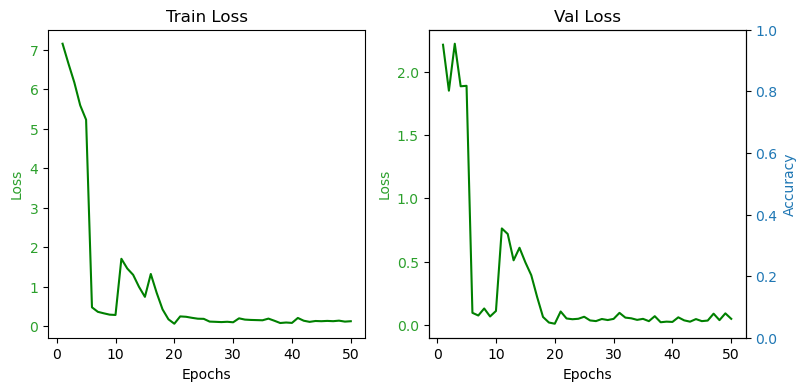

In [66]:
x = [epoch+1 for epoch in range(lstm_epochs*len(tvt_dataloaders))]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1.title.set_text('Train Loss')

train_loss_flat = [item for sublist in lstm_train_loss for item in sublist]
val_loss_flat = [item for sublist in lstm_val_loss for item in sublist]

ax1.plot(x, train_loss_flat, color='green',label='Train Loss')

ax2.title.set_text('Val Loss')
ax2.plot(x, val_loss_flat, color='green',label='Loss')

ax3 = ax2.twinx()

color = 'tab:blue'
ax3.set_ylabel('Accuracy', color=color)
# ax3.plot(x, lstm_val_acc, color=color)
ax3.tick_params(axis='y', labelcolor=color)

color = 'tab:green'
ax2.set_ylabel('Loss', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel('Loss', color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")

plt.show()

In [67]:
lstm_loss = val(lstm_model, test_dataloader, criterion)


print(f"Test Loss (LSTM): {lstm_loss:.2f}")

Test Loss (LSTM): 0.01


In [68]:
lstm_model.eval()
print(len(test_dataset))

with torch.no_grad():
  for i, (inputs, labels) in enumerate(test_dataloader):
    print(i)
    print(f"Input shape: {inputs.shape}")  # Check input shape
    # print(f"Sample input: {inputs[0]}")     # Inspect the first input of the batch

    output = lstm_model(inputs)
    print(f"Output: {list(zip(output, labels))}")  # Print output

lstm_model.train()

1
0
Input shape: torch.Size([1, 1008, 17])
Output: [(tensor([0.5454]), tensor(0.4560))]


LSTM(
  (lstm): LSTM(17, 16, num_layers=4, batch_first=True)
  (dense): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
  )
)

### Predicting Change From Current Stock Price

In [69]:
# Predict the stock price for all stocks, pick the 10 best performing stocks and the 10 worst performing stocks
# Use the LSTM model to predict the stock price for the next 5 days
for i in range(len(tvt_dataloaders)):
  ticker, (train_loader, val_loader, test_loader) = tvt_dataloaders[i]
  price = predict(lstm_model, test_loader)

  print(f"Predicted price for {ticker}: {price}")
  print(f"Current price for {ticker}: {stock_data[ticker]['Close'][-1]}")

  print(f"Predicted percentage change in stock price for {ticker}: {(price - stock_data[ticker]['Close'][-1]) / stock_data[ticker]['Close'][-1]}")







0
Input shape: torch.Size([1, 1008, 17])
Sample input: tensor([[0.0274, 0.0261, 0.0276,  ..., 0.5772, 0.5636, 0.0830],
        [0.0214, 0.0231, 0.0241,  ..., 0.5762, 0.5664, 0.0669],
        [0.0203, 0.0239, 0.0255,  ..., 0.5788, 0.5692, 0.0501],
        ...,
        [0.7383, 0.7321, 0.7412,  ..., 0.3894, 0.3774, 0.3036],
        [0.7385, 0.7367, 0.7432,  ..., 0.3972, 0.3771, 0.2803],
        [0.7441, 0.7607, 0.7501,  ..., 0.4164, 0.3812, 0.3094]])
Output: tensor([[0.6589]])
Predicted price for GOOG: tensor([[0.6589]])
Current price for GOOG: 0.9576551688722974
Predicted percentage change in stock price for GOOG: tensor([[-0.3120]])
0
Input shape: torch.Size([1, 1008, 17])
Sample input: tensor([[0.7692, 0.5854, 0.7787,  ..., 0.5242, 0.5086, 0.0527],
        [0.7642, 0.5725, 0.7557,  ..., 0.5099, 0.4998, 0.0662],
        [0.7448, 0.5607, 0.7399,  ..., 0.4935, 0.4884, 0.0739],
        ...,
        [0.1848, 0.1633, 0.1788,  ..., 0.5631, 0.5606, 0.0950],
        [0.2085, 0.1557, 0.2112,  .

## Stock Data Calculator Functions

**General Notes:**

These functions should all be callable so that I can use them in my portfolio optimization file and enable real time data for our system. You can also make a function that calls all of these at the same time and returns a dictionary containing all of these values (a dictionary of directories) with tickers as keys in the first dictionary and then ‘risk’, ‘price’, ‘expected_returns’, and ‘sector’ as keys in the second dictionary. All of these functions should also take in a data and a range to calculate data from so that we can calculate past data effectively.


In [ ]:
def risk_func(tkrs, df, start_date, end_date=None):
    """
    Given a list of tickers, return a dictionary matching 
    the tickers to their risk. Risk can be calculated as the 
    standard deviation of the normalized prices over some period of time.
    Alternative risk calculations can be the range of the high and low 
    points of the stock price in that period of time. 

    Inputs:
    tkrs: List of tickers
    df: DataFrame of stock data
    start_date: Start of the time period
    end_date: End of the time period

    Outputs:
    risk_dict: Dictionary of tickers to their risk, defined as the standard deviation of the normalized closing price from a given day
    """

    if end_date is None:
        end_date = df.index[-1]

    time_period = df.index[(df.index >= start_date) & (df.index <= end_date)]

    risk_dict = {}

    for t in tkrs:
        risk_dict[t] = df[t]['Close'][time_period].std()

    return risk_dict


def expected_returns(tkrs, df, time_period_start, time_period_end=None):
    """
    Given a list of tickers, return a dictionary matching the tickers 
    to their expected return. Expected return can be calculated as the 
    average return over some period of time. For example, if you are 
    trying to calculate the expected annual return, then take the 
    average of the annual returns for a past certain number of years.

    Inputs:
    tkrs: List of tickers
    df: DataFrame of stock data
    time_period_start: Start of the time period
    time_period_end: End of the time period

    Outputs:
    expected_return_dict: Dictionary of tickers to their expected return
    """

    if time_period_end is None:
        time_period_end = df.index[-1]

    time_period = df.index[(df.index >= time_period_start) & (df.index <= time_period_end)]
    expected_return_dict = {}

    for t in tkrs:
        expected_return_dict[t] = df[t][time_period].mean()

    return expected_return_dict


def sectors(tkrs, df, start_date, end_date=None):
    """
    Given a list of tickers, return a dictionary matching the tickers to the sector that they belong to. 
    
    Inputs:
    tkrs: List of tickers
    df: DataFrame of stock data

    Outputs:
    sectors: Dictionary of sectors to the tickers that belong to that sector
    """
    
    if end_date is None:
        end_date = df.index[-1]

    time_period = df.index[(df.index >= start_date) & (df.index <= end_date)]

    sectors = {}
    for t in tkrs:

        t_sector = df[df['Symbol'] == t]['GICS Sector'][time_period].values[0]
        
        if t_sector not in sectors:
            sectors[t_sector] = [t]
        else:
            sectors[t_sector].append(t)

    return sectors


def prices(tkrs, df, start_date, end_date=None):
    """
    Given a list of tickers, return a dictionary matching the tickers to their current price. 
    
    Inputs:
    tkrs: List of tickers
    df: DataFrame of stock data

    Outputs:
    prices: Dictionary of tickers to their current price
    """

    if end_date is None:
        end_date = df.index[-1]
    
    prices = {}
    for t in tkrs:
        prices[t] = df[t]['Close'][end_date]

    return prices


def all_stock_calc_funcs(tkrs, df, start_date, end_date=None):
    """
    Return a dictionary of all the returned data from the 
    stock calculation functions.

    Inputs:
    tkrs: List of tickers
    df: DataFrame of stock data
    start_date: Start of the time period
    end_date: End of the time period

    Outputs:
    all_data: Dictionary of all the data returned from the stock calculation functions
    """

    risk = risk_func(tkrs, df, start_date, end_date)
    expected_return = expected_returns(tkrs, df, start_date, end_date)
    sectors = sectors(tkrs, df, start_date, end_date)
    price = prices(tkrs, df, start_date, end_date)

    all_data = {
        'Risks': risk,
        'Expected Returns': expected_return,
        'Sectors': sectors,
        'Prices': price
    }

    return all_data